In [1]:
import rawpy
from PIL import Image, ExifTags
from colour_demosaicing import demosaicing_CFA_Bayer_bilinear, demosaicing_CFA_Bayer_Malvar2004, demosaicing_CFA_Bayer_Menon2007
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from photutils.detection import DAOStarFinder

In [3]:
raw = rawpy.imread('M81+82_052424/DSC_0079.NEF')

In [4]:
raw.raw_image

array([[ 784,  956,  784, ..., 1000,  758, 1000],
       [ 950,  860,  950, ...,  840,  950,  840],
       [1809,  906, 1809, ..., 1021,  752, 1021],
       ..., 
       [ 934,  914,  934, ...,  906,  928,  906],
       [ 722,  952,  722, ...,  944,  738,  944],
       [ 916, 1047,  916, ...,  983,  884,  983]], dtype=uint16)

In [5]:
raw.raw_colors

array([[0, 1, 0, ..., 1, 0, 1],
       [3, 2, 3, ..., 2, 3, 2],
       [0, 1, 0, ..., 1, 0, 1],
       ..., 
       [3, 2, 3, ..., 2, 3, 2],
       [0, 1, 0, ..., 1, 0, 1],
       [3, 2, 3, ..., 2, 3, 2]], dtype=uint8)

In [6]:
raw.color_desc

b'RGBG'

In [7]:
dmBl_im = demosaicing_CFA_Bayer_bilinear(raw.raw_image, 'RGGB')


In [8]:
dmM04_im = demosaicing_CFA_Bayer_Malvar2004(raw.raw_image, 'RGGB')


In [9]:
dmM07_im = demosaicing_CFA_Bayer_Menon2007(raw.raw_image, 'RGGB')

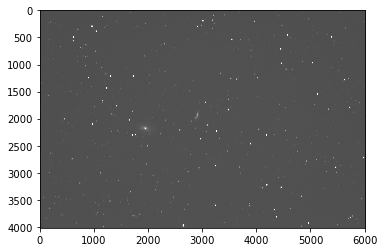

In [10]:
plt.imshow(dmBl_im[:,:,0], vmax=2000, cmap='gray')

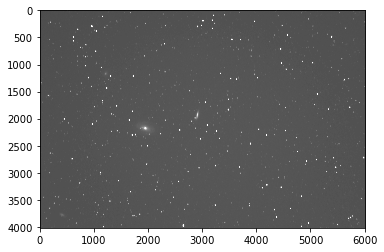

In [11]:
plt.imshow(dmBl_im[:,:,1], vmax=2000, cmap='gray')

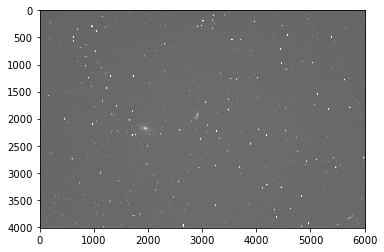

In [12]:
plt.imshow(dmBl_im[:,:,2], vmax=2000, cmap='gray')

In [13]:
dmBl_im

array([[[ 1764.  ,   476.5 ,   215.  ],
        [ 1176.  ,  1195.  ,   430.  ],
        [ 1176.  ,   710.5 ,   447.  ],
        ..., 
        [ 1159.5 ,  1250.  ,   420.  ],
        [ 1137.  ,   737.5 ,   420.  ],
        [  568.5 ,  1500.  ,   630.  ]],

       [[ 1944.75,  1187.5 ,   430.  ],
        [ 1296.5 ,   940.5 ,   860.  ],
        [ 1296.5 ,   950.  ,   894.  ],
        ..., 
        [  753.5 ,  1003.5 ,   840.  ],
        [  755.  ,   950.  ,   840.  ],
        [  377.5 ,   742.75,  1260.  ]],

       [[ 2713.5 ,   678.  ,   430.  ],
        [ 1809.  ,   906.  ,   860.  ],
        [ 1809.  ,   910.  ,   903.  ],
        ..., 
        [  734.  ,  1021.  ,   892.  ],
        [  752.  ,  1008.75,   892.  ],
        [  376.  ,  1276.25,  1338.  ]],

       ..., 
       [[ 1113.  ,  1167.5 ,   457.  ],
        [  742.  ,   939.5 ,   914.  ],
        [  742.  ,   934.  ,   913.  ],
        ..., 
        [  761.5 ,   925.5 ,   906.  ],
        [  758.  ,   928.  ,   906.  ],
     

In [12]:
dmM07_im[:,:,1]

array([[  252.        ,   956.        ,   425.33333333, ...,
         1000.        ,  1001.91666667,  1000.        ],
       [  950.        ,   914.16666667,   950.        , ...,
          967.91666667,   950.        ,   961.5       ],
       [ 1079.33333333,   906.        ,  1524.75      , ...,
         1021.        ,  1025.25      ,  1021.        ],
       ..., 
       [  934.        ,   937.91666667,   934.        , ...,
          883.08333333,   928.        ,   883.08333333],
       [  939.66666667,   952.        ,   915.66666667, ...,
          944.        ,   888.5       ,   944.        ],
       [  916.        ,  1034.83333333,   916.        , ...,
          976.58333333,   884.        ,   976.58333333]])

In [15]:
dmBl_im.reshape((dmBl_im.shape[2], dmBl_im.shape[1], dmBl_im.shape[0]))

array([[[ 1764.  ,   476.5 ,   215.  , ...,   445.  ,  1095.  ,   726.25],
        [  450.  ,  1107.  ,  1195.  , ...,   691.5 ,   480.5 ,  1149.  ],
        [ 1100.  ,   485.  ,  1128.  , ...,  1144.5 ,  1142.5 ,   464.  ],
        ..., 
        [  943.  ,   743.  ,   949.25, ...,   960.5 ,   953.5 ,   739.  ],
        [  944.  ,   935.  ,   728.  , ...,   800.  ,   942.  ,   917.  ],
        [  836.  ,  1007.5 ,   908.5 , ...,   940.  ,   768.  ,   991.  ]],

       [[  928.5 ,   771.  ,  1000.  , ...,   959.25,   932.  ,   763.  ],
        [ 1030.  ,   912.  ,   766.  , ...,   732.5 ,   947.75,   952.  ],
        [  748.  ,   938.  ,   958.  , ...,   983.  ,   794.  ,   954.  ],
        ..., 
        [ 1026.  ,   928.  ,   788.  , ...,   769.  ,   977.  ,   956.  ],
        [  762.  ,  1019.25,   992.5 , ...,  1015.  ,   740.  ,   898.  ],
        [  973.5 ,   746.5 ,   964.  , ...,   878.  ,   999.5 ,   763.  ]],

       [[  955.  ,   975.  ,   758.  , ...,   751.5 ,   995.5 ,  104

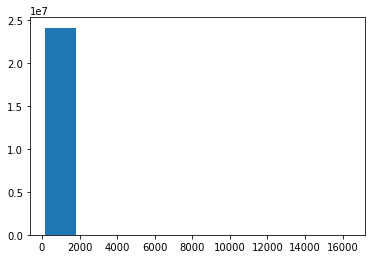

In [16]:
plt.hist(dmBl_im[:,:,0].flatten());

In [17]:
f'{100:04}'

'0100'

In [18]:
dmBl_im/2000

array([[[ 0.882   ,  0.23825 ,  0.1075  ],
        [ 0.588   ,  0.5975  ,  0.215   ],
        [ 0.588   ,  0.35525 ,  0.2235  ],
        ..., 
        [ 0.57975 ,  0.625   ,  0.21    ],
        [ 0.5685  ,  0.36875 ,  0.21    ],
        [ 0.28425 ,  0.75    ,  0.315   ]],

       [[ 0.972375,  0.59375 ,  0.215   ],
        [ 0.64825 ,  0.47025 ,  0.43    ],
        [ 0.64825 ,  0.475   ,  0.447   ],
        ..., 
        [ 0.37675 ,  0.50175 ,  0.42    ],
        [ 0.3775  ,  0.475   ,  0.42    ],
        [ 0.18875 ,  0.371375,  0.63    ]],

       [[ 1.35675 ,  0.339   ,  0.215   ],
        [ 0.9045  ,  0.453   ,  0.43    ],
        [ 0.9045  ,  0.455   ,  0.4515  ],
        ..., 
        [ 0.367   ,  0.5105  ,  0.446   ],
        [ 0.376   ,  0.504375,  0.446   ],
        [ 0.188   ,  0.638125,  0.669   ]],

       ..., 
       [[ 0.5565  ,  0.58375 ,  0.2285  ],
        [ 0.371   ,  0.46975 ,  0.457   ],
        [ 0.371   ,  0.467   ,  0.4565  ],
        ..., 
        [ 0.38075 ,  0

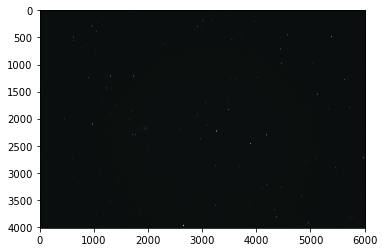

In [19]:
fig, ax = plt.subplots()
ax.imshow(dmBl_im/np.max(dmBl_im), vmax=0.07)

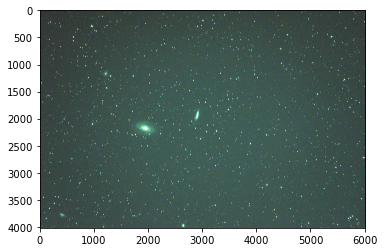

In [160]:
fig, ax = plt.subplots()
wp_r = 1100
bp_r = 650
wp_g = 1200
bp_g = 850
wp_b = 1200
bp_b = 850
wp = 1100
bp = 700
dat = np.array(dmM07_im)
# dat = np.uint8(dat/np.max(dat) * 255)
# dat_int8 = dat/np.max(dat) * 255
# dat_int8[dat_int8 < (bp/np.max(dat)*255)] = 0
# dat_int8[dat_int8 > (wp/np.max(dat)*255)] = 255

# dat_int8 = (dat-bp)/(wp-bp) * 255
dat_int8 = np.array(dat, dtype=int)
dat_int8[:,:,0] = (dat[:,:,0]-bp_r)/(wp_r-bp_r) * 255
dat_int8[:,:,1] = (dat[:,:,1]-bp_g)/(wp_g-bp_g) * 255
dat_int8[:,:,2] = (dat[:,:,2]-bp_b)/(wp_b-bp_b) * 255

dat_int8[dat_int8 < 0] = 0
dat_int8[dat_int8 > 255] = 255

dat_int8 = np.uint8(dat_int8)

# dat = np.uint8((dat-bp)/(wp-bp) * 255)
# dat[:,:,0][dat[:,:,0] < bp_r] = 0
# dat[:,:,1][dat[:,:,0] < bp_g] = 0
# dat[:,:,2][dat[:,:,0] < bp_b] = 0
# dat[:,:,0] = dat[:,:,0]/wp_r *255
# dat[:,:,1] = dat[:,:,1]/wp_g *255
# dat[:,:,2] = dat[:,:,2]/wp_b *255
ax.imshow(dat_int8)

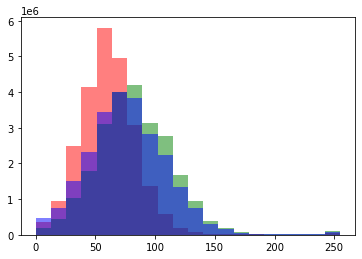

In [161]:
# plt.hist(dat_int8[:,:,0].flatten(), bins=20, range=(0.8*bp/np.max(dat)*255,wp/np.max(dat)*255*1.3), color='r',alpha=0.5);
# plt.hist(dat_int8[:,:,1].flatten(), bins=20, range=(0.8*bp/np.max(dat)*255,wp/np.max(dat)*255*1.3), color='g',alpha=0.5);
# plt.hist(dat_int8[:,:,2].flatten(), bins=20, range=(0.8*bp/np.max(dat)*255,wp/np.max(dat)*255*1.3), color='b',alpha=0.5);
# range=(0.8*bp,wp*1.3)

plt.hist(dat_int8[:,:,0].flatten(), bins=20, range=(0,255), color='r',alpha=0.5);
plt.hist(dat_int8[:,:,1].flatten(), bins=20, range=(0,255), color='g',alpha=0.5);
plt.hist(dat_int8[:,:,2].flatten(), bins=20, range=(0,255), color='b',alpha=0.5);

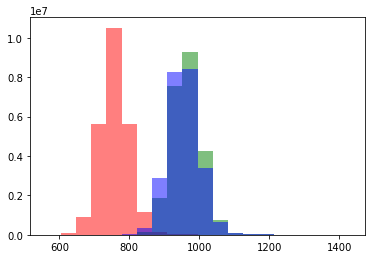

In [153]:
plt.hist(dat[:,:,0].flatten(), bins=20, range=(0.8*bp,wp*1.3), color='r',alpha=0.5);
plt.hist(dat[:,:,1].flatten(), bins=20, range=(0.8*bp,wp*1.3), color='g',alpha=0.5);
plt.hist(dat[:,:,2].flatten(), bins=20, range=(0.8*bp,wp*1.3), color='b',alpha=0.5);
# range=(0.8*bp,wp*1.3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


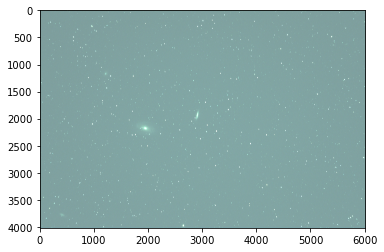

In [134]:
fig, ax = plt.subplots()
wp = 1500
bp = 500
dat = np.array(dmBl_im)
dat[dat < bp] = 0
ax.imshow(dat/wp)

(array([  6.50713670e+07,   7.33112900e+06,   3.48010000e+04,
          1.36160000e+04,   7.10200000e+03,   4.57300000e+03,
          3.08400000e+03,   2.22300000e+03,   1.67100000e+03,
          1.36800000e+03,   1.17100000e+03,   9.70000000e+02,
          8.44000000e+02,   6.93000000e+02,   6.48000000e+02,
          5.97000000e+02,   4.75000000e+02,   4.68000000e+02,
          4.36000000e+02,   3.53200000e+03]),
 array([ 0.01126167,  0.06069859,  0.11013551,  0.15957242,  0.20900934,
         0.25844626,  0.30788317,  0.35732009,  0.406757  ,  0.45619392,
         0.50563084,  0.55506775,  0.60450467,  0.65394159,  0.7033785 ,
         0.75281542,  0.80225233,  0.85168925,  0.90112617,  0.95056308,
         1.        ]),
 <BarContainer object of 20 artists>)

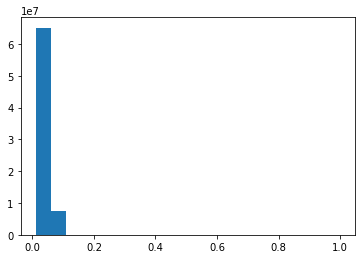

In [20]:
plt.hist((dmBl_im/np.max(dmBl_im)).flatten(), bins=20)

In [21]:
np.array((dmBl_im/(2**8)), dtype=int).shape

(4016, 6016, 3)

In [22]:
dmBl_im

array([[[ 1764.  ,   476.5 ,   215.  ],
        [ 1176.  ,  1195.  ,   430.  ],
        [ 1176.  ,   710.5 ,   447.  ],
        ..., 
        [ 1159.5 ,  1250.  ,   420.  ],
        [ 1137.  ,   737.5 ,   420.  ],
        [  568.5 ,  1500.  ,   630.  ]],

       [[ 1944.75,  1187.5 ,   430.  ],
        [ 1296.5 ,   940.5 ,   860.  ],
        [ 1296.5 ,   950.  ,   894.  ],
        ..., 
        [  753.5 ,  1003.5 ,   840.  ],
        [  755.  ,   950.  ,   840.  ],
        [  377.5 ,   742.75,  1260.  ]],

       [[ 2713.5 ,   678.  ,   430.  ],
        [ 1809.  ,   906.  ,   860.  ],
        [ 1809.  ,   910.  ,   903.  ],
        ..., 
        [  734.  ,  1021.  ,   892.  ],
        [  752.  ,  1008.75,   892.  ],
        [  376.  ,  1276.25,  1338.  ]],

       ..., 
       [[ 1113.  ,  1167.5 ,   457.  ],
        [  742.  ,   939.5 ,   914.  ],
        [  742.  ,   934.  ,   913.  ],
        ..., 
        [  761.5 ,   925.5 ,   906.  ],
        [  758.  ,   928.  ,   906.  ],
     

In [23]:
2000/2**8

7.8125

In [24]:
dmBl_im/7.8125

array([[[ 225.792,   60.992,   27.52 ],
        [ 150.528,  152.96 ,   55.04 ],
        [ 150.528,   90.944,   57.216],
        ..., 
        [ 148.416,  160.   ,   53.76 ],
        [ 145.536,   94.4  ,   53.76 ],
        [  72.768,  192.   ,   80.64 ]],

       [[ 248.928,  152.   ,   55.04 ],
        [ 165.952,  120.384,  110.08 ],
        [ 165.952,  121.6  ,  114.432],
        ..., 
        [  96.448,  128.448,  107.52 ],
        [  96.64 ,  121.6  ,  107.52 ],
        [  48.32 ,   95.072,  161.28 ]],

       [[ 347.328,   86.784,   55.04 ],
        [ 231.552,  115.968,  110.08 ],
        [ 231.552,  116.48 ,  115.584],
        ..., 
        [  93.952,  130.688,  114.176],
        [  96.256,  129.12 ,  114.176],
        [  48.128,  163.36 ,  171.264]],

       ..., 
       [[ 142.464,  149.44 ,   58.496],
        [  94.976,  120.256,  116.992],
        [  94.976,  119.552,  116.864],
        ..., 
        [  97.472,  118.464,  115.968],
        [  97.024,  118.784,  115.968],
     